#                                          Breast Cancer Wisconsin Diagnosis Dataset 

The Breast Cancer Wisconsin Diagnosis (BCWD) dataset is a widely used dataset in medical research and machine learning for breast cancer classification. It contains features extracted from digitized images of fine needle aspirate (FNA) biopsies of breast masses, which help distinguish between benign (non-cancerous) and malignant (cancerous) tumors.

### Dataset Overview:
* Objective: To classify tumors as benign (B) or malignant (M) based on extracted cell characteristics.
* Total Samples: 569
* Total Features: 32 (including ID, diagnosis, and 30 numerical attributes)
* Target Variable (diagnosis):
    * M → Malignant (cancerous)
    * B → Benign (non-cancerous)
### Feature Breakdown:
Each tumor is described using 10 key attributes, computed in three different ways:
* Mean value
* Standard error
* Worst (mean of the three largest values)
  
### The 10 attributes include:
* Radius (mean distance from center to points on perimeter)
* Texture (variation in grayscale values)
* Perimeter
* Area
* Smoothness (local variation in radius lengths)
* Compactness (perimeter² / area - 1.0)
* Concavity (severity of concave portions of the contour)
* Concave points (number of concave portions of the contour)
* Symmetry
* Fractal dimension (coastline approximation)

### Why Is This Dataset Important?
* It provides a real-world medical application for machine learning.
* Early and accurate detection of breast cancer can significantly improve patient outcomes.
* It allows for feature selection, model evaluation, and medical insights into tumor classification.

### Logistic Regression is used to predict whether the given patient is having Malignant or Benign tumor based on the attributes in the given dataset. 

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [164]:
datas=pd.read_csv('data (1).csv')

Import Dataset 

In [166]:
datas.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [167]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning

In [169]:
datas.drop(['Unnamed: 32', 'id'], axis = 1,inplace=True)

First Drop non useful column named as 'Unnamed' 

In [171]:
# Check for missing values
print("Missing values:")
print(datas.isnull().sum())


Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Check for the missing values

# Data Visualization


Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


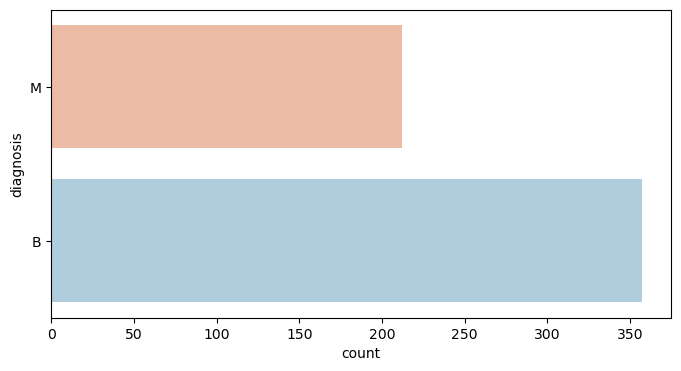

In [174]:
import warnings
warnings.filterwarnings("ignore")

# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(datas['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = datas['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(datas) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(datas) * 100, 2), '%')




##### Out of the 569 observations, 357 (or 62.74%) have been labeled malignant, while the rest 212 (or 37.26%) have been labeled benign. Later when we develop a predictive model and test it on unseen data, we should expect to see a similar proportion of labels.

##### Our dataset consists of 30 columns, excluding the ID and diagnosis columns. However, these features are highly interrelated since they represent measurements of the same 10 key attributes from three different perspectives: 
* Mean values
* Standard errors
* Worst values (mean of the three largest measurements)
    
##### To gain quick insights, we can simplify our analysis by focusing on just one perspective. A logical choice is the mean values, as they provide a general representation of each attribute.

##### To explore potential patterns between these 10 "mean" attributes and the diagnosis variable, we can visualize them using a scatter plot matrix:

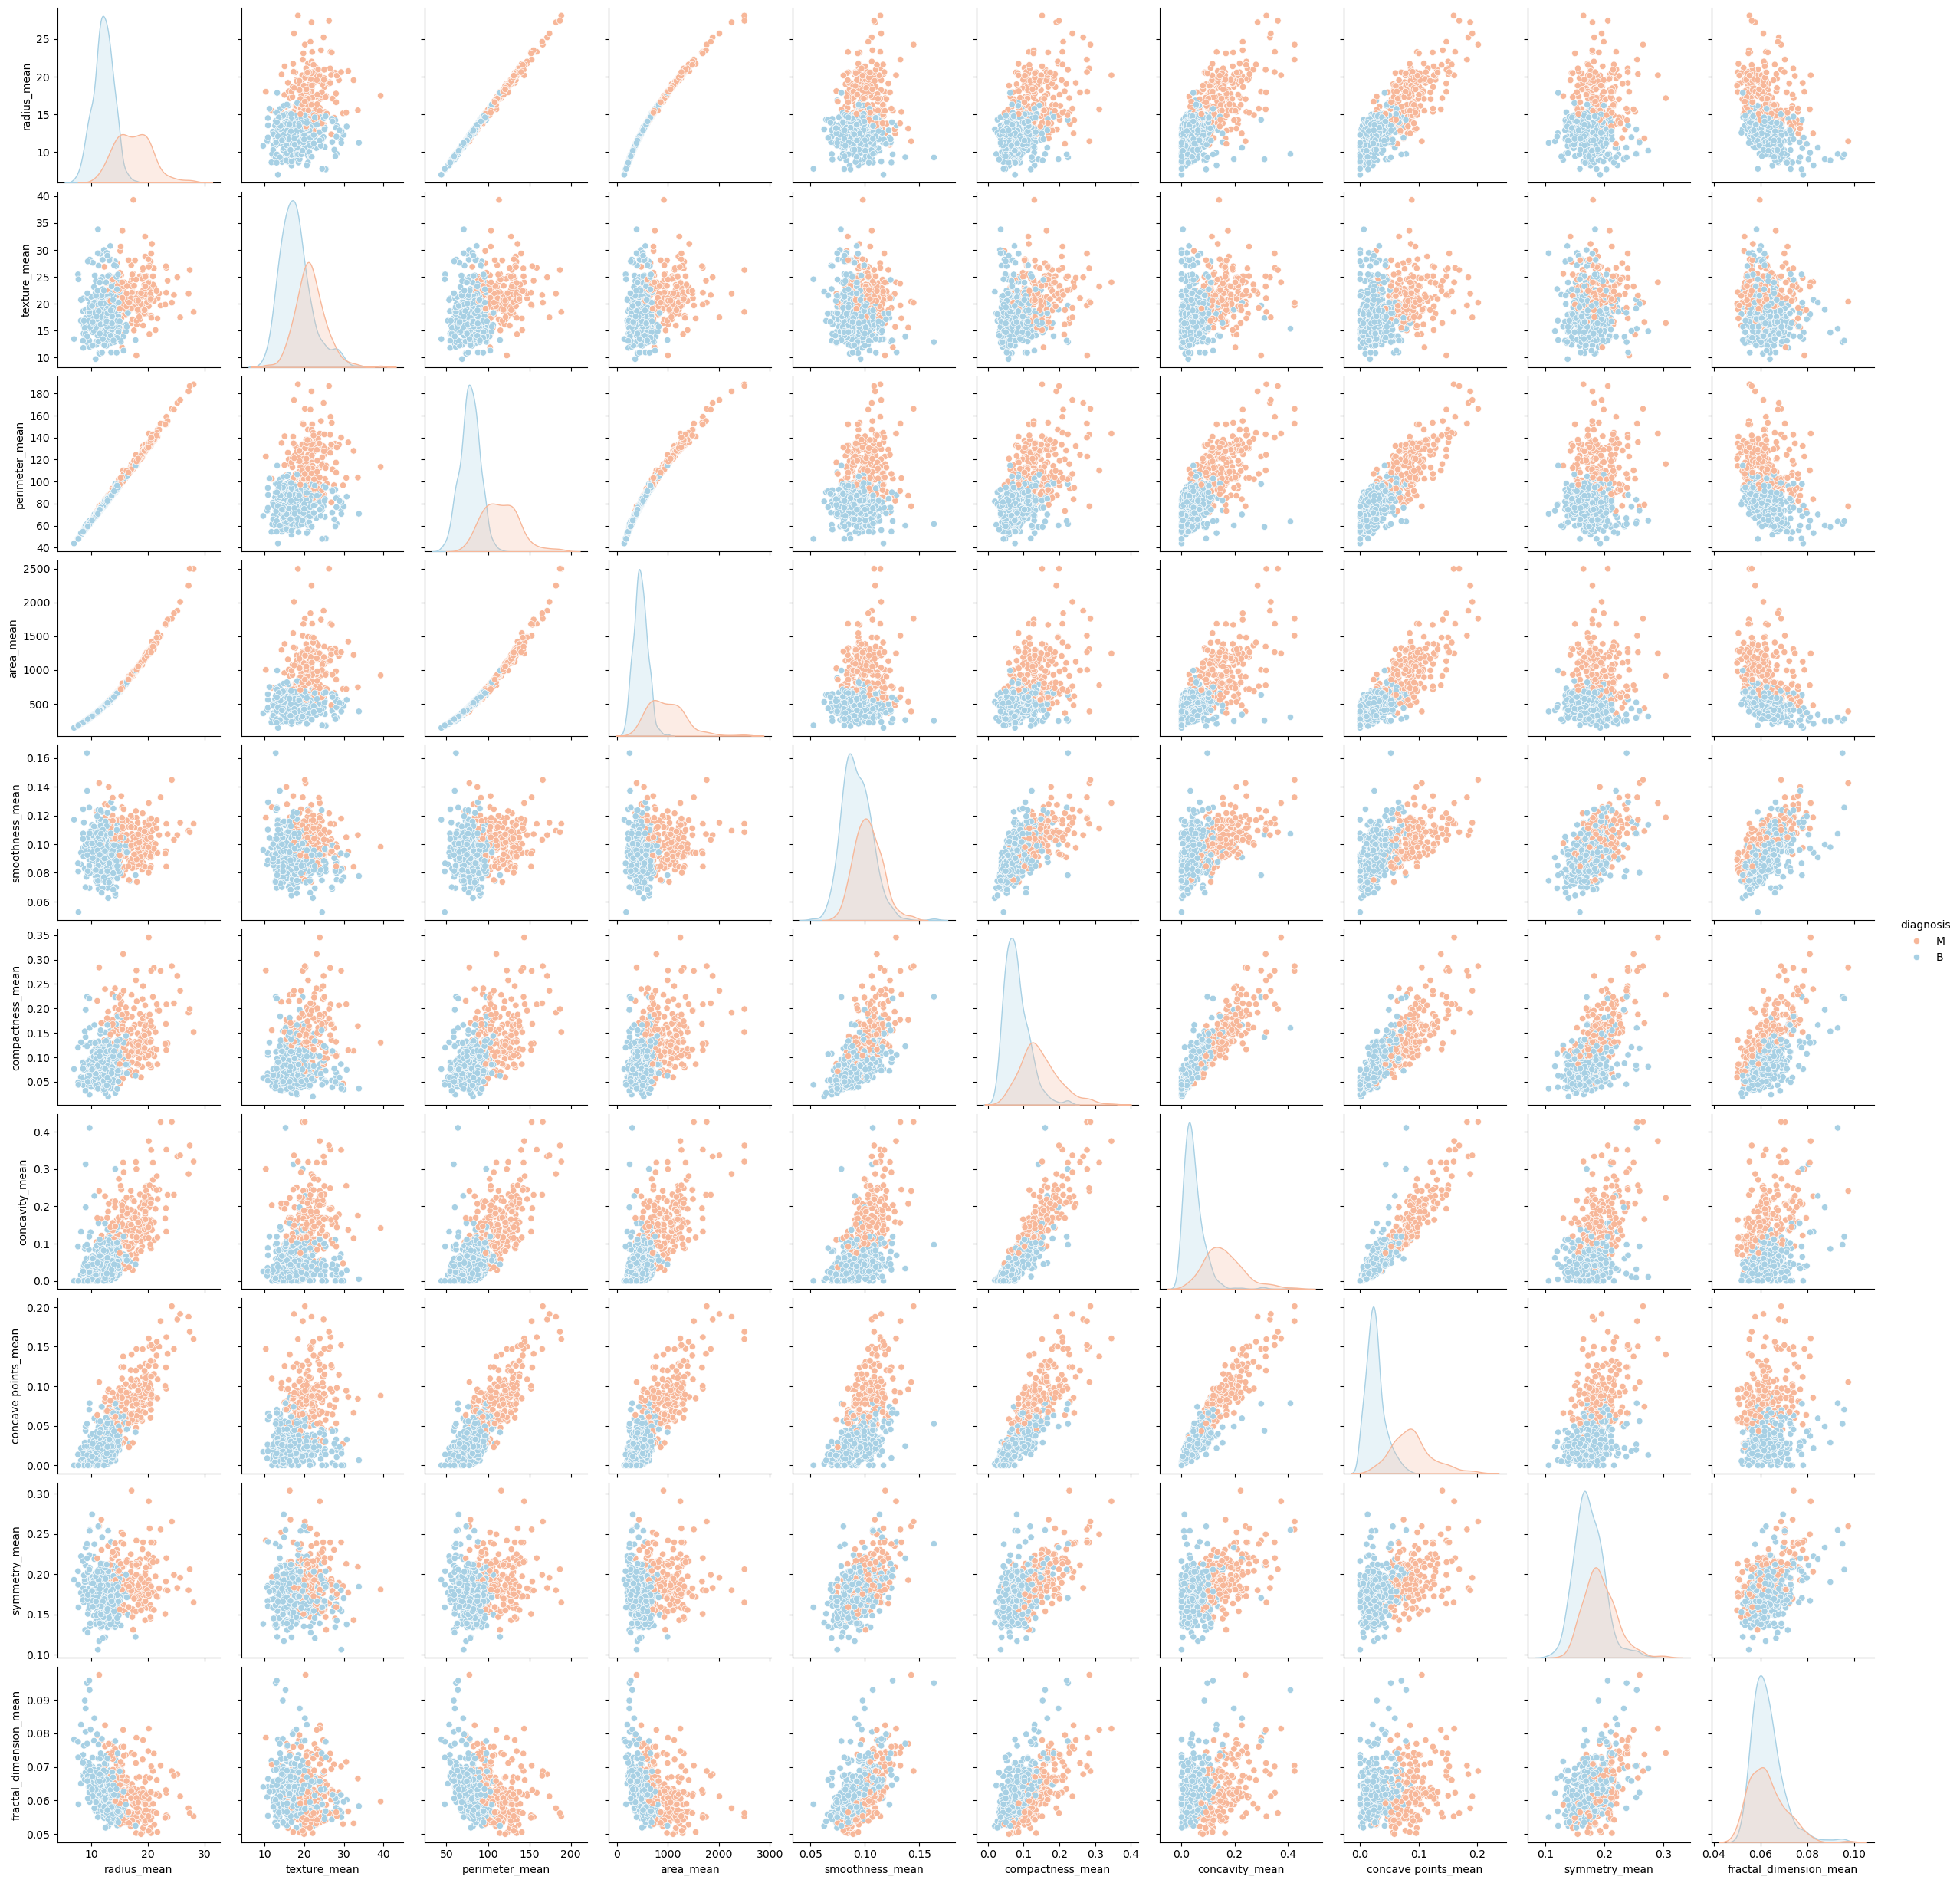

In [177]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=datas[cols], hue='diagnosis', palette='RdBu')

#### There are some noticeable patterns in the scatter plot matrix. For example, the almost perfectly linear relationships between radius, perimeter, and area suggest strong multicollinearity among these variables. Similarly, concavity, concave points, and compactness also appear to be highly correlated.

#### To further investigate this, the next section will present a correlation matrix instead of a scatter plot matrix. This will allow us to statistically assess the degree of multicollinearity between these variables and confirm our observations. Let’s dive in!

#### As mentioned earlier, let’s now examine the correlations between all variables. This time, however, we will generate a correlation matrix that includes all three perspectives:
* Mean values
* Standard errors
* Worst values
#### This will help us gain a comprehensive understanding of the relationships between the features and identify any strong correlations that may indicate multicollinearity.

In [180]:
datas['diagnosis'] = datas['diagnosis'].map({'M': 1, 'B': 0})

The map() function is used to convert categorical labels into numerical values.

-'M' (Malignant) is mapped to 1

-'B' (Benign) is mapped to 0

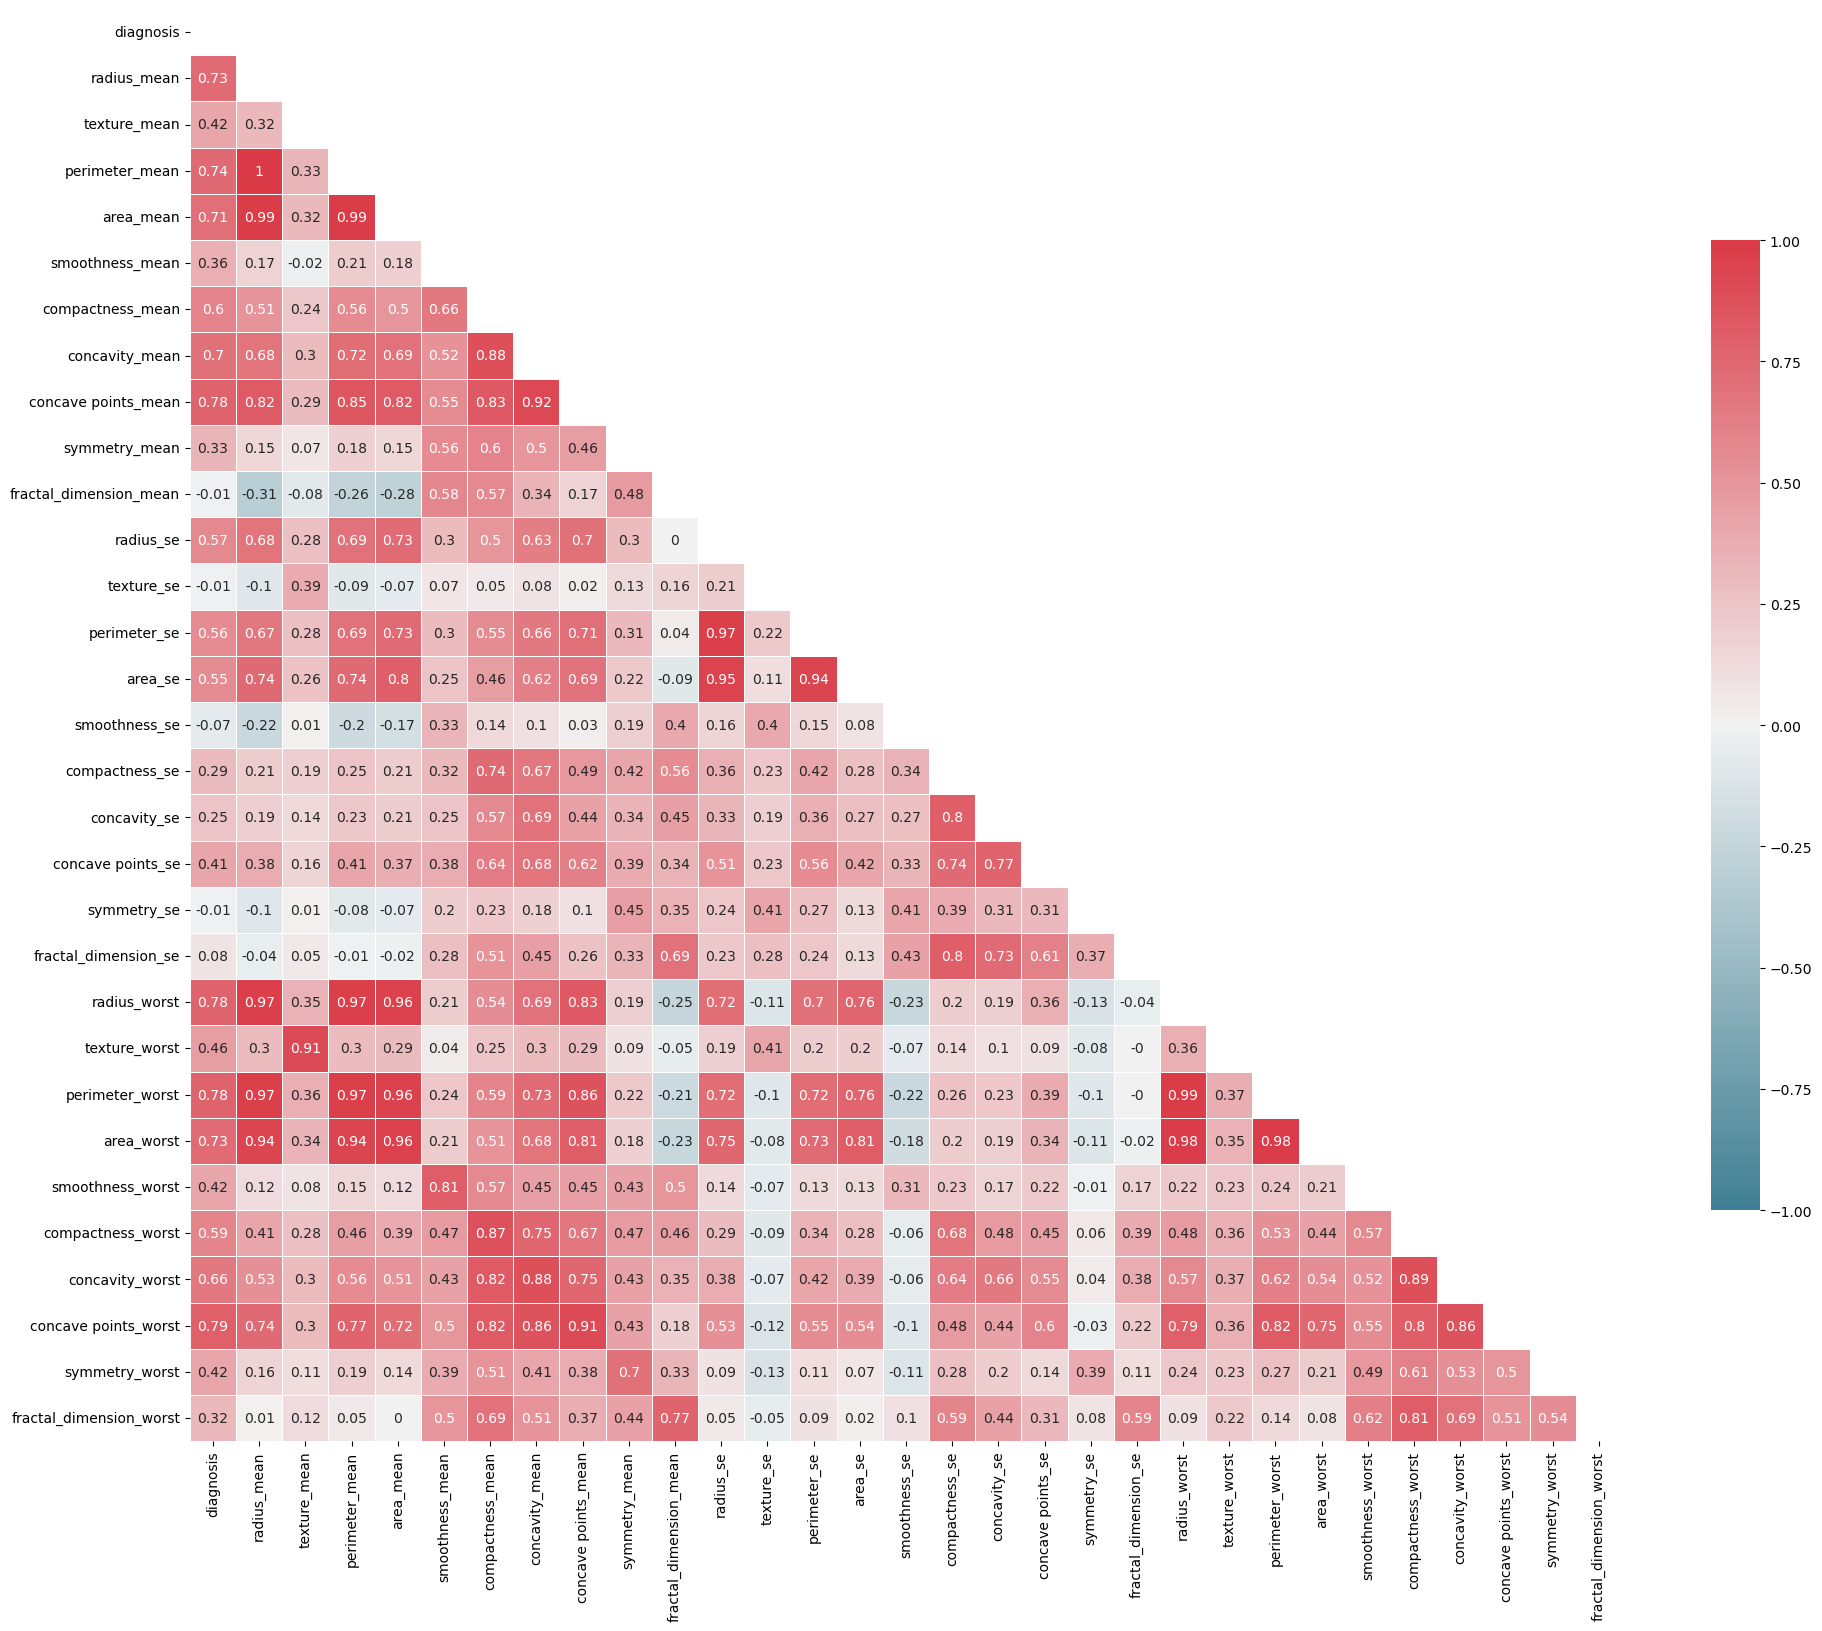

In [182]:
# Generate and visualize the correlation matrix
corr = datas.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

#### Examining the correlation matrix, we can immediately confirm the presence of multicollinearity among certain variables. For example, radius_mean has a correlation of 1.00 with perimeter_mean and 0.99 with area_mean. This strong correlation suggests that these features essentially capture the same information—representing the overall size of the cell.

#### To avoid redundancy in further analysis, it would be wise to retain only one of these three variables.

#### Another clear instance of multicollinearity is the strong correlation between the "mean" and "worst" columns. For example, radius_mean has a correlation of 0.97 with radius_worst. In fact, all 10 key attributes exhibit very high correlations (ranging from 0.7 to 0.97) between their "mean" and "worst" versions.

#### This is expected since the "worst" columns are derived from the "mean" columns—they represent the mean of the three largest values for each attribute. Given this redundancy, it would be reasonable to discard the "worst" columns and focus our analysis on the "mean" columns to avoid multicollinearity.



#### In summary, we will drop all "worst" columns from our dataset and select only one of the three attributes that describe cell size. But which one should we choose?

#### Let’s take a quick geometry refresher! If we assume a cell is approximately circular:

* Radius (r) is the fundamental size measurement.
* Perimeter = 2πr
* -Area = πr²
#### Since radius serves as the foundational building block of cell size, it makes the most sense to retain radius as our representative attribute while discarding perimeter and area.

#### Similarly, we observe multicollinearity among compactness, concavity, and concave points, which all describe the cell’s shape. To keep things simple, we will retain compactness, as its name is more intuitive, and remove the other two.

#### Now, let's proceed with dropping the unnecessary columns!

In [185]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
datas = datas.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
datas = datas.drop(cols, axis=1)
# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
datas = datas.drop(cols, axis=1)

# verify remaining columns
datas.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

#### Let's take a look at the correlation matrix once again, this time created with our trimmed-down set of variables.

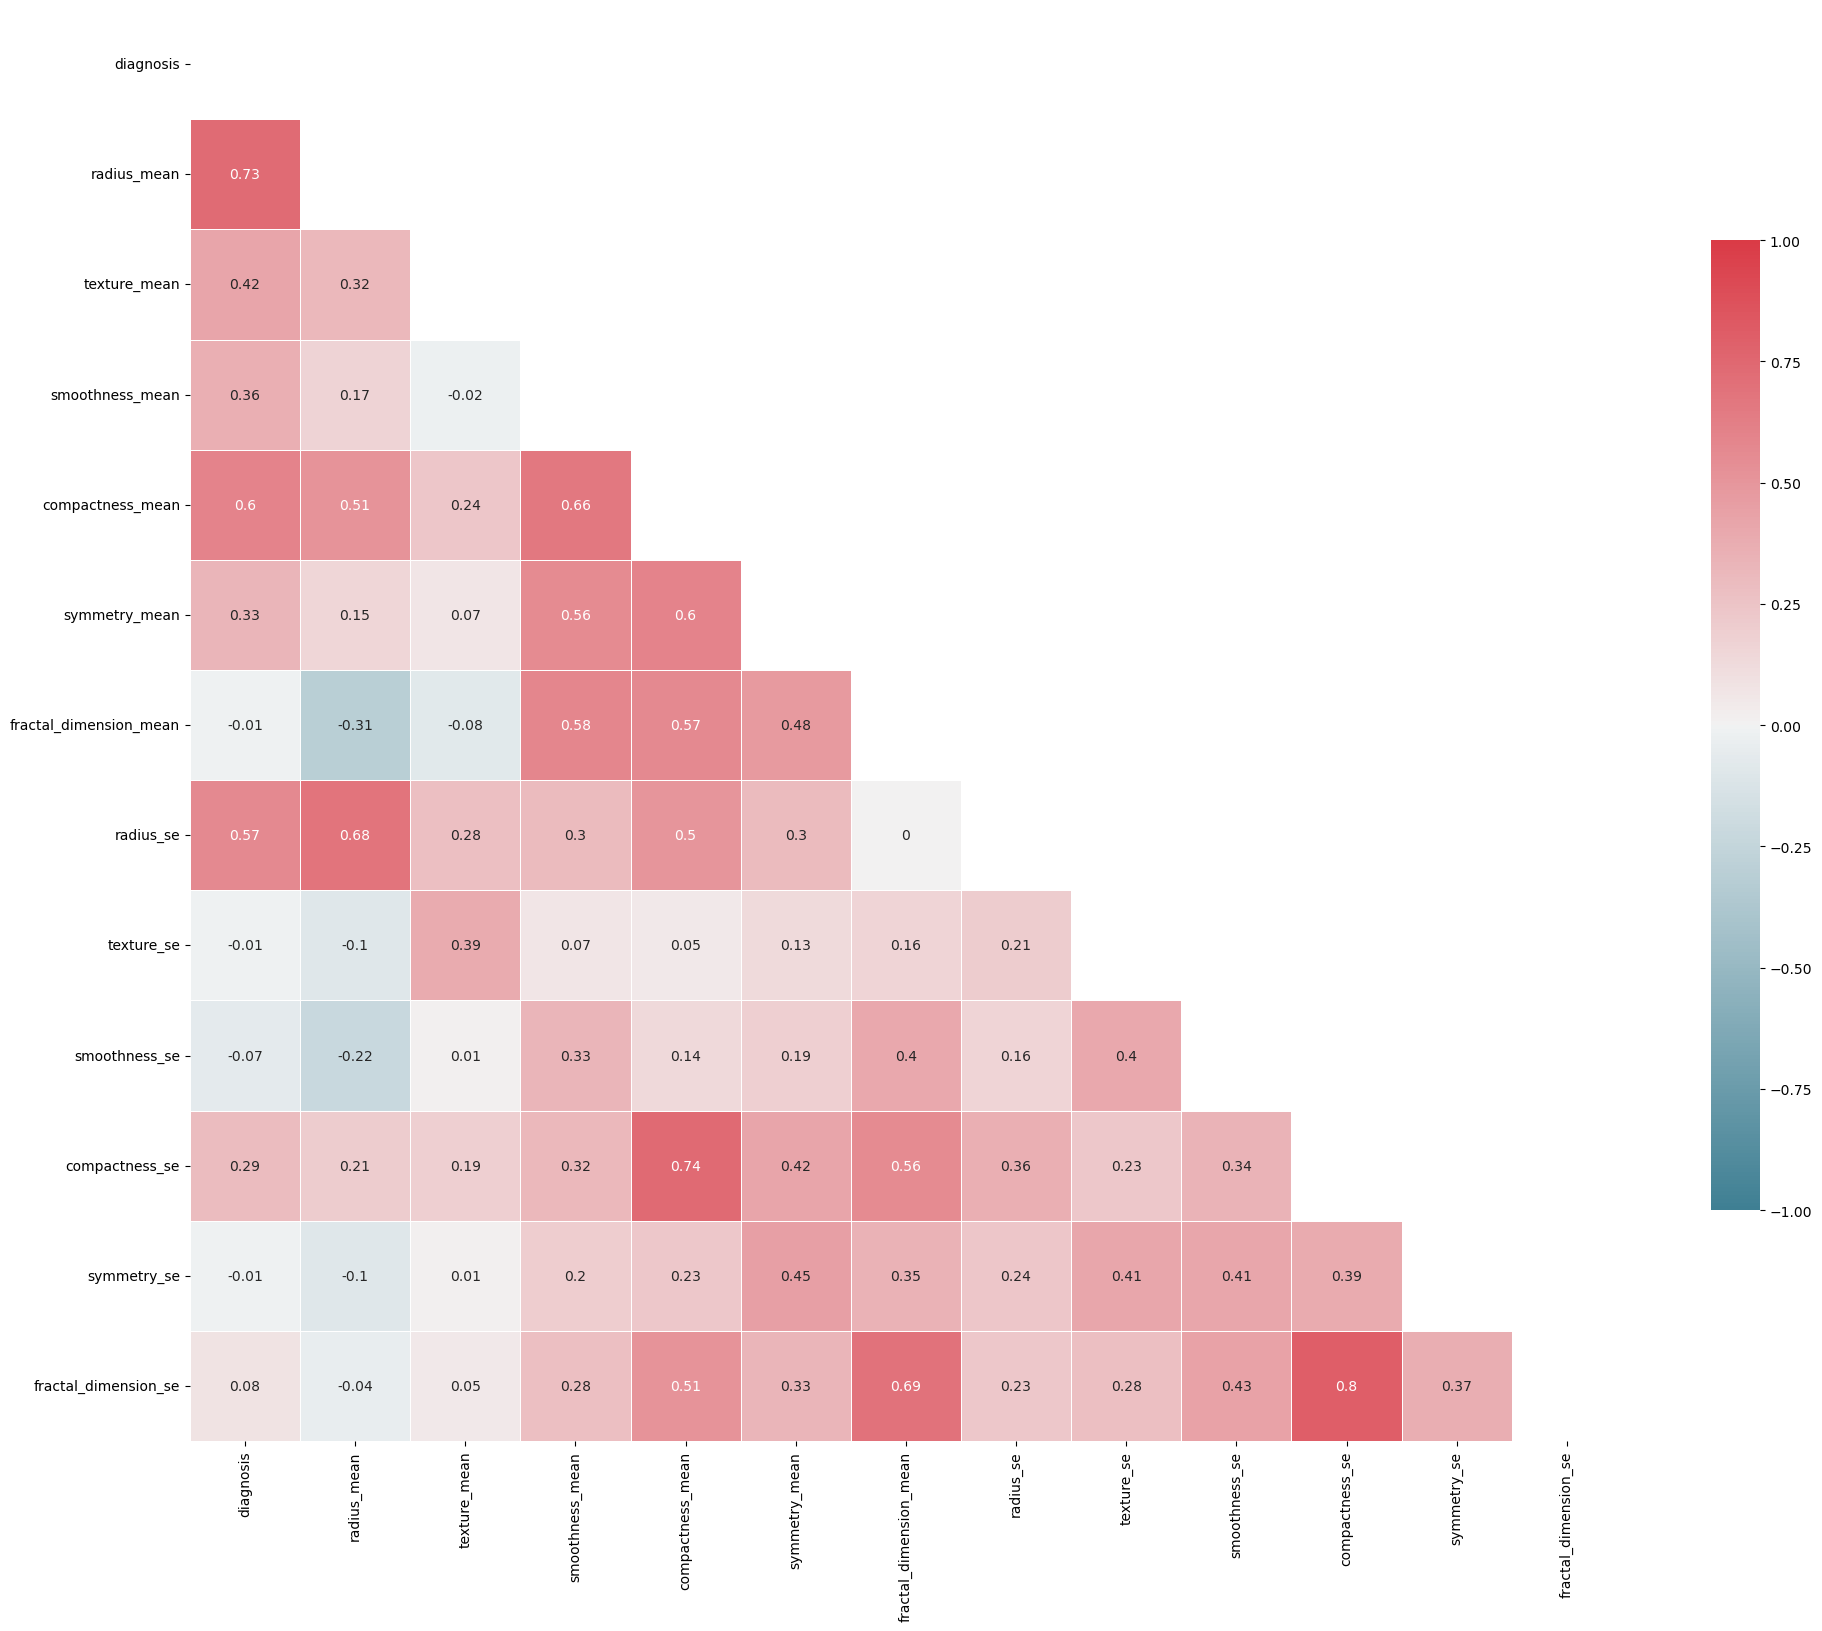

In [187]:
# Draw the heatmap again, with the new correlation matrix
corr = datas.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

# Model Creation

##### Now, it's finally time to build our model!

##### The first step is to split our dataset into two parts:

* A training set to train the model.
* A test set to evaluate the model’s performance on unseen data.



# Input & Output

In [191]:
X = datas.drop(columns=['diagnosis'])
y = datas['diagnosis']

# Train and Test Split

##### We will set the test size to 0.3; i.e., 70% of the data will be assigned to the training set, and the remaining 30% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 40.

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (455, 12)
x test:  (114, 12)
y train:  (455,)
y test:  (114,)


##### feature scaling
##### Before training our model, we need to apply feature scaling to ensure that all variables are on a similar scale. This is especially important for models that rely on distance-based calculations (e.g., logistic regression, SVM, and KNN) or gradient-based optimization (e.g., neural networks).

##### There are two common types of scaling:

    1.Standardization (Z-score normalization)
        Formula: 
        𝑋′= 𝑋−𝜇 /𝜎
 
        Centers the data around zero with a standard deviation of one.
        Works well for models like logistic regression, SVM, and neural networks.
                  



In [196]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualizations

### Class Distribution Plot

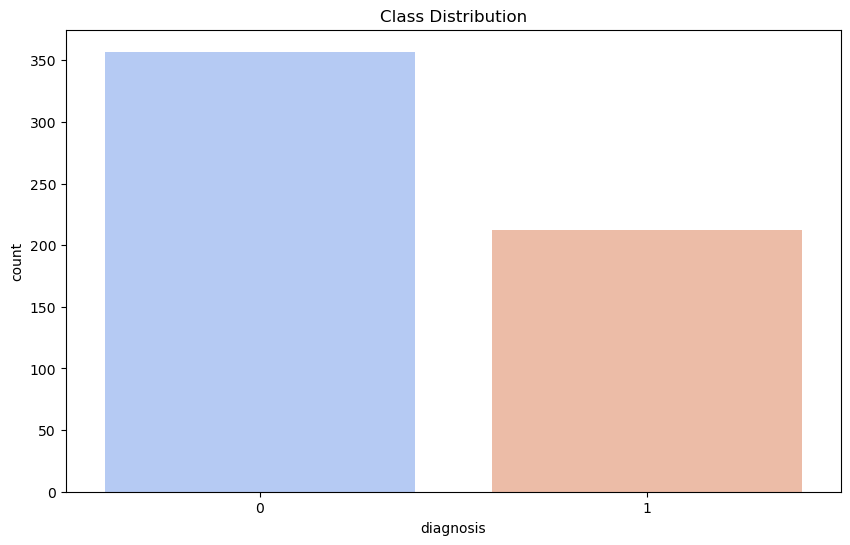

In [199]:

plt.figure(figsize=(10,6))
sns.countplot(x=datas['diagnosis'], palette='coolwarm')
plt.title('Class Distribution')
plt.show()



##### This count plot shows the distribution of benign (B) and malignant (M) tumors in the dataset.
##### If the classes are imbalanced (e.g., significantly more benign cases than malignant), it could impact model performance.

### Feature Correlation Heatmap

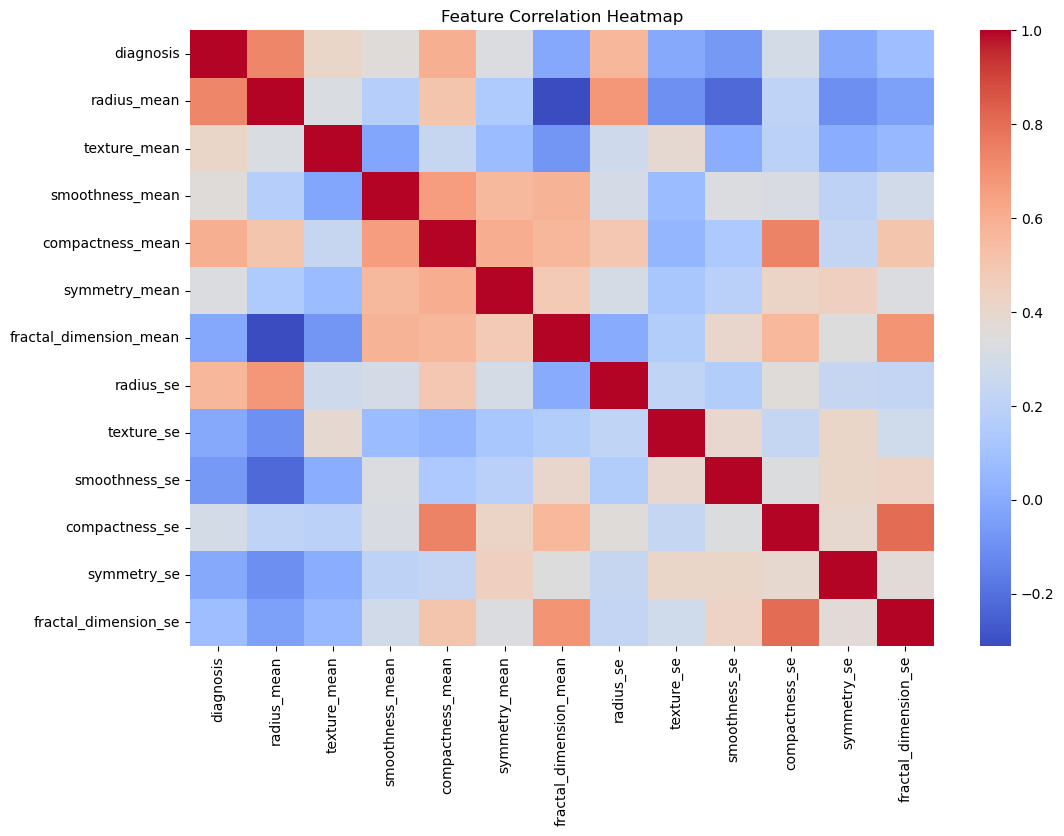

In [202]:
plt.figure(figsize=(12, 8))
sns.heatmap(datas.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

##### -This heatmap shows the correlation between different features in the dataset.
* Red (high positive correlation, closer to 1) → Features move in the same direction (e.g., radius, perimeter, and area are strongly correlated).
* Blue (negative correlation, closer to -1) → One feature increases while the other decreases.
* Lighter colors (closer to 0) → Weak or no correlation.
##### -Strong correlations indicate multicollinearity, meaning some features might be redundant and should be removed to improve model efficiency.

# Train Logistic Regression Model

##### We trained a Logistic Regression model to classify whether a tumor is benign (0) or malignant (1) based on the selected features. Let’s break down the training and evaluation process:

In [206]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

##### We created a Logistic Regression model and trained it using the training dataset (X_train, y_train).
##### The model learns to differentiate between benign and malignant tumors based on the input features.

## Making Predictions

In [209]:
y_pred = model.predict(X_test)

##### Once trained, we used the model to predict the tumor type for the test dataset (X_test).
##### The predicted values (y_pred) were then compared with the actual values (y_test) to evaluate the model’s performance.

# Evaluate Model Performance

### Accuracy Score

In [213]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9561


##### The accuracy score (0.9561 or 95.61%) tells us how often the model correctly predicts the tumor type.
##### A high accuracy indicates that the model is performing well in classifying the tumors correctly.

### Classification Report

In [216]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



##### This report provides a detailed breakdown of the model’s performance:

##### 
* Precision: Measures how many of the predicted cases were actually correct.

    -Example: 93% of the tumors predicted as malignant were actually malignant.
* Recall: Measures how well the model identifies actual malignant cases.

    -Example: 95% of actual malignant tumors were correctly classified.
* F1-score: A balanced metric combining precision and recall.
#####  Overall, the model is highly effective in classifying both benign and malignant tumors.

### Confusion Matrix

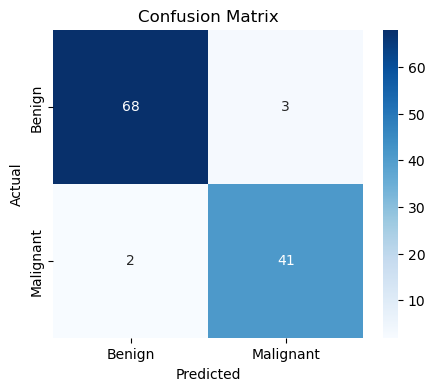

In [262]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### A confusion matrix helps visualize the model's predictions:
* True Positives (41): Malignant tumors correctly classified as malignant.
* True Negatives (68): Benign tumors correctly classified as benign.
* False Positives (3): Benign tumors misclassified as malignant (false alarm).
* False Negatives (2): Malignant tumors misclassified as benign (missed cases).


### Conclusion:


✅ Accuracy = 95.61% → The model performs well.

✅ High Precision & Recall → It correctly identifies most malignant and benign cases.

✅ Few False Negatives → Only 2 malignant cases were misclassified.


The Logistic Regression model is effective, making it a good choice for tumor classification in medical diagnosis. 